<center> <img src="https://jaliscocomovamos.org/wp-content/uploads/2021/04/iteso-logo.jpg" align="center" width="960" height="480"/> </center>

<center><font color=#555555><font size=6> ITESO </font> <br> <br>
    
<center><font color=#555555><font size=5> Microstructure and Trading systems</font> <br> <br> <br> <br>

<center><font color=#555555><font size=6> Xareny González López, if720811@iteso.mx </font> <br> <br>
   
<center> <font color= #555555> <font size = 4> June 2022 </a> | <font color= #555555> <font size = 4> Repository: <a href='https://github.com/Xarenyglp/Lab2-Models'>Link</a></font>

<hr style="border:0.02in solid gray"> </hr>

<center> <font color= #555555> <font size = 6> Laboratory 2 </font> <br> <br> <font color= #555555> <font size = 5> Models  </font>

<hr style="border:0.02in solid gray"> </hr>

<br>

<font color= #555555> <font size = 4> Abstract </font>

<font color= #6B6B6B> <font size = 3>  Include here a description of the whole work, use no more than 400 words, you can use **Bold** and *Italic* highlights, also you can inclue [links](www.iteso.mx). Usually is a good strategy to generate this text at the very end of the process, since you have to include all aspects of the work, from a brief introduction, to problem definitions and methods used, to finally the results found. </font>

<br>

# <font color= #6B6B6B> <font size = 6> 1. Introduction </font>

<hr style="border:0.02in solid gray"> </hr>

This is an introduction, normally, it is done at the very end, when all the other content in the notebook is completed but just before the abstract (which is short version of the introduction) ... 

<br>

# <font color= #6B6B6B> 2. Install/Load Packages and Depedencies </font>

<hr style="border:0.02in solid gray"> </hr>

## <font color= #6B6B6B> 2.1 Python Packages </font> <font color= #555555>

In order to run this notebook, it is necessary to have installed and/or have the _requirements.txt_ file with the following: 

- pandas>=1.4.2
- numpy>=1.18.5
- jupyter>=1.0.0
- plotly>=4.14

## <font color= #6B6B6B> 2.2 Files Dependencies </font> <font color= #555555>

The following are the file dependencies that are needed to run this notebook:

- files/orderbooks_05jul21.json : Orderbook in JSON format

## <font color= #6E6E6E> 2.3 Install Packages</font>

In [1]:
%%capture
#!{sys.executable} -m pip install -r requirements.txt
# Install all the pip packages in the requirements.txt
import numpy as np
import pandas as pd
import data as dt
import functions
import visualizations

<br>

# <font color= #6B6B6B> 3. Data Description </font>

<hr style="border:0.02in solid gray"> </hr>

### The data used to produce results for the models consists on the Mid Prices of the provided Orderbook.
### This data consists on the realized midprices for each orderbook, it consists on 2401 different orderbooks, each one for the Buy/Sell of bitcoin/usd, within the span of an hour.

In [2]:
# DataFrame Head
# Obtaining JSON file from data library (Filename: files/orderbooks_05jul21)
data_ob = dt.ob_data
# Orderbook timestamps
ob_ts = list(data_ob.keys())
# Timestamp listings
l_ts = [pd.to_datetime(i_ts) for i_ts in ob_ts]
# Metrics from Functions library
ob_df,_,_ = functions.df_metrics(data_ob)
# midpricess from metrics dataframe
midprices = ob_df["Mid Price"]
pd.DataFrame(midprices.head())

,Mid Price
2021-07-05 13:06:46.571000+00:00,28272.5
2021-07-05 13:06:47.918000+00:00,28272.5
2021-07-05 13:06:49.414000+00:00,28272.5
2021-07-05 13:06:51.077000+00:00,28276.5
2021-07-05 13:06:52.426000+00:00,28276.5


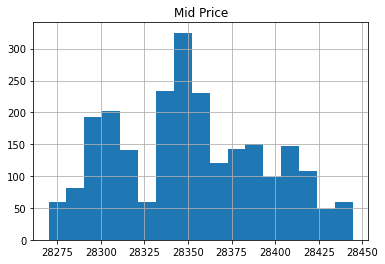

In [3]:
# Midprices Histogram
pd.DataFrame(midprices).hist(bins="auto");

<br>

# <font color= #6B6B6B> 4. Model 1: Asset Pricing Theory - Experiment 1 </font>
As stated in the introduction, this model consists on finding whether the asset price is a martingale process. In order to find if it is consistent with such model, we will provide the results on the martingale process evaluation of the afformentioned data and display it in a DataFrame.

The results will also be evaluated in two experiments: 
 - 1. The martingale process evaluation for the entire data.
 - 2. The martingale process evaluation for the minute-segmented data.

<hr style="border:0.02in solid gray"> </hr>

In [4]:
# Martingale results for the entire data:
# Metrics from Functions library
ob_df,_,_ = functions.df_metrics(data_ob)
# midpricess from metrics dataframe
midprices = ob_df["Mid Price"]

# Asset pricing model: Best estimator for future prices is current price
# Is it valid most of the time?
M1_e1 = functions.Model1_E1(midprices)
M1_e1


,amount,ratio
e1,1763.0,-0.27
e2,637.0,-0.73
total,2400.0,2400.00


<br>

# <font color= #6B6B6B> 5. Model 1: Asset Pricing Theory - Experiment 2 </font>
As stated, now the data will be segmented into the trades that ocurred in each particular minute along the entire span of the data.

<hr style="border:0.02in solid gray"> </hr>

In [5]:
# Second Experiment (Every Minute Data)
M1_E2_1,M1_E2_2 = functions.Model1_E2(midprices)
M1_E2_1.head()

,e1,e2,total,ratio1,ratio2
13:6,6,2,8,0.750000,0.250000
13:7,27,13,40,0.675000,0.325000
13:8,31,8,39,0.794872,0.205128
13:9,27,11,38,0.710526,0.289474
13:10,30,10,40,0.750000,0.250000


In [6]:
M1_E2_2

,Total trades,E1 Ratio Mean,E2 Ratio Mean
0,2400,0.743515,0.256485


# <font color= #6B6B6B> 6. Model 1: Asset Pricing Theory - Experiment 3 </font>
For this experiment, now the martingale process will be evaluated with the weighted mid prices, both for the entire data and the minute segmented data.

In [7]:
# Experiment 3: Martingale Process with Weighted MidPrice
M1_E3_1,M1_E3_2,M1_E3_3 =  functions.Model1_E3(ob_df)
M1_E3_1


,amount,ratio
e1,1622.0,0.68
e2,778.0,0.32
total,2400.0,2400.00


In [8]:
M1_E3_2.head()

,e1,e2,total,ratio1,ratio2
13:6,6,2,8,0.750000,0.250000
13:7,27,13,40,0.675000,0.325000
13:8,26,13,39,0.666667,0.333333
13:9,26,12,38,0.684211,0.315789
13:10,27,13,40,0.675000,0.325000


In [9]:
M1_E3_3

,Total trades,E1 Ratio Mean,E2 Ratio Mean
0,2400,0.686378,0.313622


# <font color= #6B6B6B> 7. Model 2: Roll Model </font>
As we've seen, this model states that the spread of the orderbook can be estimated using the 1st shit autocovariance of the price changes. For this model, the price considered is the Mid Price, and the results will be compared with the actual spread observed in the orderbook.

In [10]:
M2_1,M2_2 = functions.Model2(pd.DataFrame(midprices),ob_df)
M2_1.head()

,Spread (OB),Calculated Spread,Bid,Ask,Calc Bid,Calc Ask
2021-07-05 13:06:46.571000+00:00,5.0,0.070044,28267.5,28277.5,28272.429956,28272.570044
2021-07-05 13:06:47.918000+00:00,5.0,0.070044,28267.5,28277.5,28272.429956,28272.570044
2021-07-05 13:06:49.414000+00:00,5.0,0.070044,28267.5,28277.5,28272.429956,28272.570044
2021-07-05 13:06:51.077000+00:00,3.0,0.070044,28273.5,28279.5,28276.429956,28276.570044
2021-07-05 13:06:52.426000+00:00,3.0,0.070044,28273.5,28279.5,28276.429956,28276.570044


In [11]:
M2_2

,Spread Mean,Spread Variance,Calculated Spread,Spread Difference
0,3.946272,6.021695,0.070044,3.876229


<br>

# <font color= #6B6B6B> <font size = 6> 5. Results </font>

<hr style="border:0.02in solid gray"> </hr>

### Model 1
Model 1 or APT, was a success in correctly estimating most of the time the future price of the trade.
Although this model is not suited for more than 1 step in the future estimations, it might be useful for trading systems.
### Model 2
Model 2 or Roll Model was unsuccesful in correctly estimating the spread of the Orderbook.
This might be due to the size of the price of the asset.

<br>

## <font color= #6B6B6B> 5.1 Model 1 - Results in depth </font>

We might be able to further observe the results of the first model comparing the midprices with its prices shifted one step into the future, to observe how the tendency of the price is estimated using the APT model.

In [12]:
visualizations.Model1_Prices_Comparison(midprices)

As we can observe, most of the time the price is the same, proving to uss that APT is an adequate model.

Resuming the results of Experiment 1:

In [15]:
visualizations.Model1_graph_results_t1(M1_e1)


Resuming the results of Experiment 2:

In [16]:
visualizations.Model1_graph_results_t2(M1_E2_1)
visualizations.Model1_graph_results_t3(M1_E2_2)

Resuming the results of Experiment 3:

In [17]:
visualizations.Model1_graph_results_t1(M1_E3_1)
visualizations.Model1_graph_results_t2(M1_E3_2)
visualizations.Model1_graph_results_t3(M1_E3_3)

<br>

## <font color= #6B6B6B> 5.2 Model 2 Results </font>

# DELETE THIS CELL IN YOUR FILE

# You can have several processes with which you are obtaining the results you need.

In [18]:
visualizations.Model2_graph_results(M2_1)

<br>

# <font color= #6B6B6B> <font size = 6> 6. References </font>

<hr style="border:0.02in solid gray"> </hr>

In [14]:
# DELETE THIS CELL IN YOUR FILE

# Citations, and other references you are using.

# DO INCLUDE THE FOLLOWING CITATION FOR THIS TEMPLATE

[1] Munnoz, 2020. Python project template. https://github.com/iffranciscome/python-project. (2021).

<br>